# Import Required Libraries
Import numpy for calculations and matplotlib for plotting.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define Target Distribution
Define the Gaussian mixture model using the provided target_pdf function.

In [59]:
# Define the Gaussian function
def gaussian(x, mean, var):
    return np.exp(-np.power(x - mean, 2.) / (2 * var))

# Define the target probability density function (PDF) as a mixture of two Gaussians
def target_pdf(x):
    mean1 = 3.0 
    mean2 = -3.0 
    mean3 = 0.0
    var1 = 3.0
    var2 = 0.1
    return 0.3 * gaussian(x, mean1, var2) + 0.3 * gaussian(x, mean2, var2) + 0.4 * gaussian(x, mean3, var1)

# Create Visualization Plot
Use matplotlib to create a line plot of the PDF values against x values.

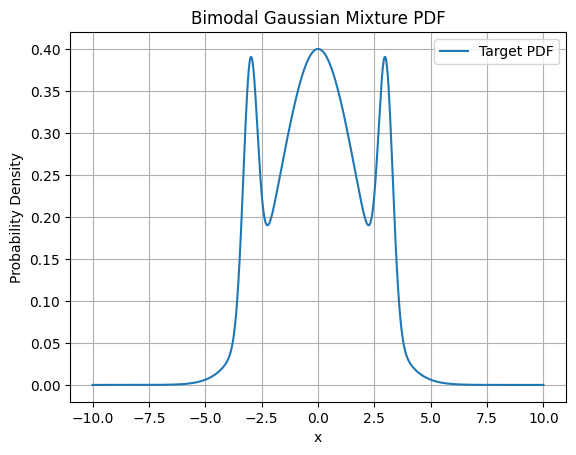

In [60]:
import matplotlib.pyplot as plt
# Calculate PDF Values
x = np.linspace(-10, 10, 1000)  # Create an array of x values from -10 to 10 with 1000 points
pdf_values = target_pdf(x)  # Compute the PDF values for each x point using the target_pdf function
# Create Visualization Plot
plt.plot(x, pdf_values, label='Target PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Bimodal Gaussian Mixture PDF')
plt.legend()
plt.grid(True)
plt.show()

Number of Monte Carlo samples: 10000
Number of Metropolis-Hastings samples: 10000


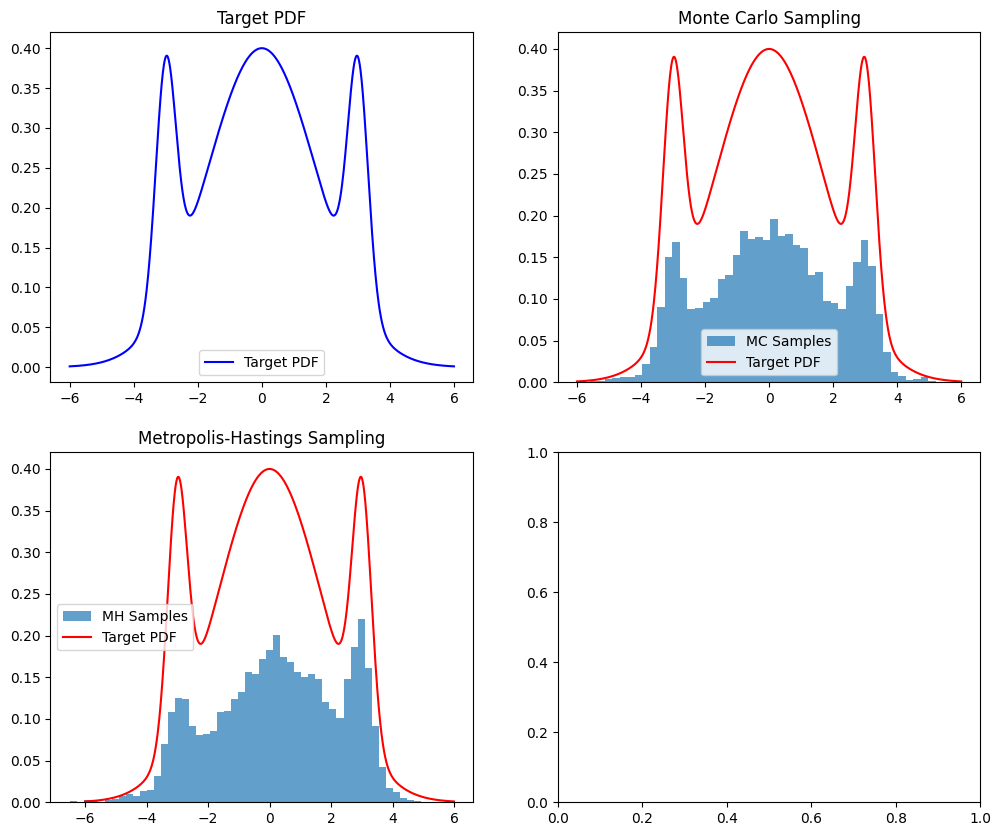

In [80]:
target_mean = 0.0 

# Create figure with 2x2 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
x = np.linspace(-6, 6, 1000)
pdf = target_pdf(x)
ax1.plot(x, pdf, 'b-', label='Target PDF')
ax1.set_title('Target PDF')
ax1.legend()

def monte_carlo_sample(n_samples, target_pdf, x_min, x_max):
    samples = []
    while (len(samples) < n_samples):
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(0, 1)
        if y < target_pdf(x):
            samples.append(x)

    return samples


# Monte Carlo sampling
n_samples = 10000
mc_samples = monte_carlo_sample(n_samples, target_pdf, -6, 6)
print(f'Number of Monte Carlo samples: {len(mc_samples)}') 
# Plot 2: Histogram of Monte Carlo samples
ax2.hist(mc_samples, bins=50, density=True, alpha=0.7, label='MC Samples')
ax2.plot(x, pdf, 'r-', label='Target PDF')
ax2.set_title('Monte Carlo Sampling')
ax2.legend()

# Symmetric Gaussian proposal distribution
def proposal_pdf(x, y):
    return gaussian(y, x, 1.0)

def metropolis_hastings_sample(n_samples, target_pdf, x_init, step_size, burn_in):
    samples = []
    x_prev = x_init
    for i in range(n_samples + burn_in):
        x_star = np.random.normal(x_prev, step_size)
        p_star = target_pdf(x_star)
        p_prev = target_pdf(x_prev)
        acceptance_ratio = min(1, p_star / p_prev)
        u = np.random.uniform(0, 1)
        if u < acceptance_ratio:
            x_prev = x_star
        if i >= burn_in:
            samples.append(x_prev)

    return samples

# Metropolis-Hastings sampling
n_samples = 10000
x_init = 0.0
step_size = 0.5
burn_in = 1000
mh_samples = metropolis_hastings_sample(n_samples, target_pdf, x_init, step_size, burn_in)
print(f'Number of Metropolis-Hastings samples: {len(mh_samples)}')
# Plot 3: Histogram of Metropolis-Hastings samples
ax3.hist(mh_samples, bins=50, density=True, alpha=0.7, label='MH Samples')
ax3.plot(x, pdf, 'r-', label='Target PDF')
ax3.set_title('Metropolis-Hastings Sampling')
ax3.legend()



In [81]:
# Statitical Metrics
error_mc = np.mean(mc_samples) - target_mean 
print("Monte Carlo Sampling Error: ", error_mc)
var_mc = np.var(mc_samples)
print("Monte Carlo Sampling Variance: ", var_mc)
error_mh = np.mean(mh_samples) - target_mean
print("Metropolis-Hastings Sampling Error: ", error_mh)
var_mh = np.var(mh_samples)
print("Metropolis-Hastings Sampling Variance: ", var_mh)

Monte Carlo Sampling Error:  0.030566447918984226
Monte Carlo Sampling Variance:  4.208464814195047
Metropolis-Hastings Sampling Error:  0.26273115505024613
Metropolis-Hastings Sampling Variance:  4.2756657794861725


C:\Users\Color\AppData\Local\Temp\ipykernel_8596\1439113294.py:26: RuntimeWarning: divide by zero encountered in scalar power
  e4 = i ** (a - 1)
C:\Users\Color\AppData\Local\Temp\ipykernel_8596\1439113294.py:27: RuntimeWarning: divide by zero encountered in scalar power
  e5 = (1 - i) ** (b - 1)


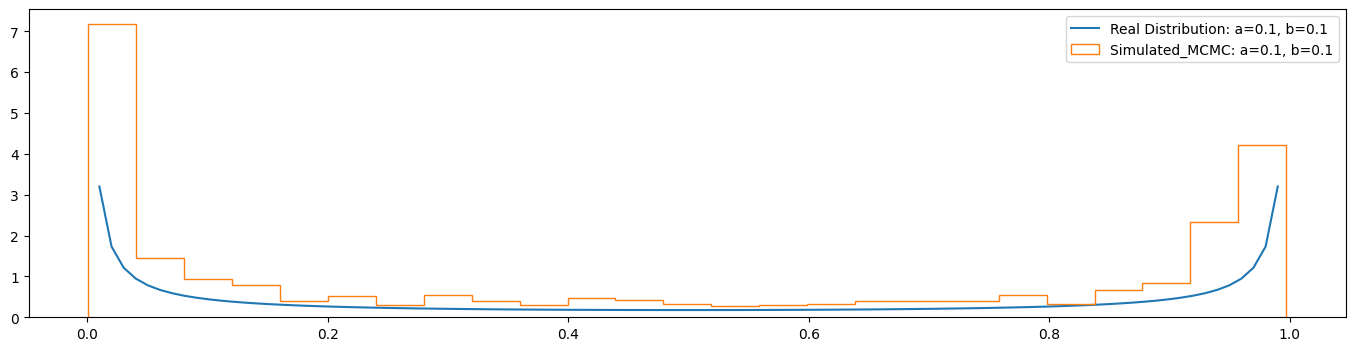

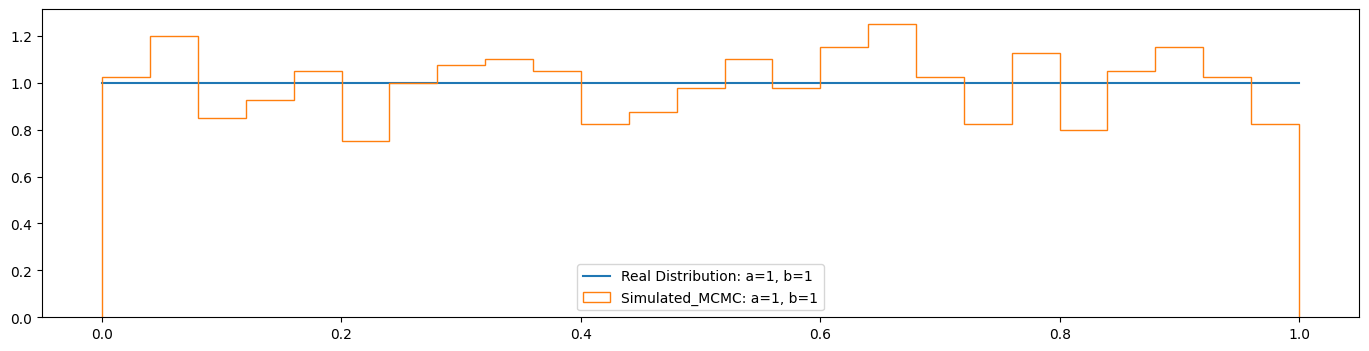

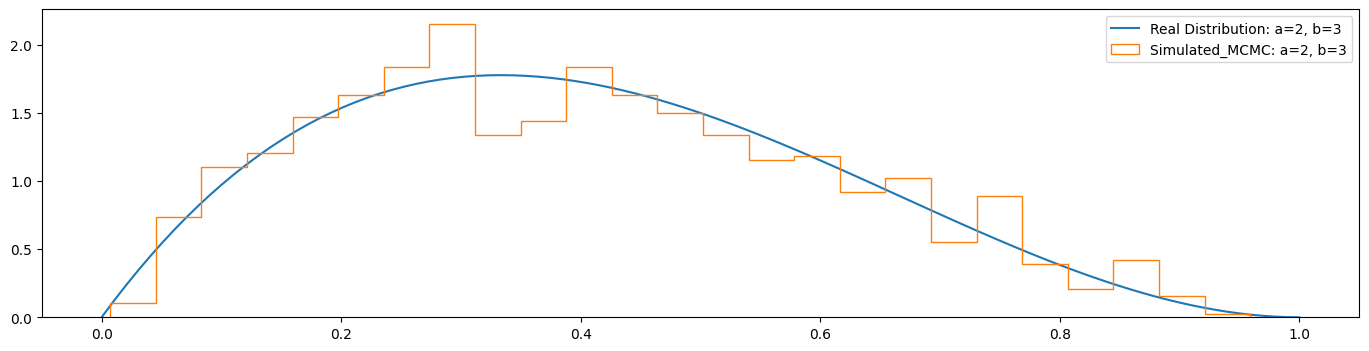

In [ ]:
import random 

def beta_s(w, a, b):
    return w**(a-1) * (1-w)**(b-1)
        
def beta_mcmc(N_hops, a, b, N_samples = 1000):
    assert N_samples <= N_hops
    states = []
    cur = random.uniform(0, 1)
    for i in range(N_hops):
        states.append(cur)
        next = random.uniform(0, 1)
        if min(beta_s(next, a, b) / beta_s(cur, a, b),1) > random.uniform(0, 1):
            cur = next
    return states[-N_samples:]

from matplotlib import pylab as pl
import matplotlib.pyplot as plt
import scipy.special as ss
pl.rcParams['figure.figsize'] = (17.0, 4.0)

# Actual Beta PDF.
def beta(a, b, i):
    e1 = ss.gamma(a + b)
    e2 = ss.gamma(a)
    e3 = ss.gamma(b)
    e4 = i ** (a - 1)
    e5 = (1 - i) ** (b - 1)
    return (e1/(e2*e3)) * e4 * e5

# Create a function to plot Actual Beta PDF with the Beta Sampled from MCMC Chain.
def plot_beta(a, b):
    Ly = []
    Lx = []
    i_list = np.mgrid[0:1:100j]
    for i in i_list:
        Lx.append(i)
        Ly.append(beta(a, b, i))
    pl.plot(Lx, Ly, label="Real Distribution: a="+str(a)+", b="+str(b))
    plt.hist(beta_mcmc(100000,a,b),density=True,bins =25, 
            histtype='step',label="Simulated_MCMC: a="+str(a)+", b="+str(b))
    pl.legend()
    pl.show()

plot_beta(0.1, 0.1)
plot_beta(1, 1)
plot_beta(2, 3)